# Comparing TOY2DC solutions to the theoretic one

The model is homogeneous with $v_p = 3000 \, m/s, \rho = 2.5 \, g/cc, Qp = 1000$. The acquistion geomotry is crosswell. The Green's function of 2D acoustic wave equation in a homogeneous medium is $$G_{2D}=\frac{i}{4}H_0(kr) \,$$ where $H_0$ is the first kind Hankel function of zeroth order; $k = \frac{\omega}{v_p}$, $v_p = v_{p_0} (1 - \frac{i}{2Q_p})$.

In [1]:
import numpy as np
from utils_plotting_toy2dac import PltToy2dac
from utils_marmousi_cw import AcqCw

In [2]:
datadir = '/project/stewart/wzhang/TOY2DAC/crosswell_toy2dac/FWI/Mamousi/fdtest'
freqlist = np.arange(2, 301, 1)
npml = 10
nz = 801
nx = 401
dx = 1.25
x0 = 9100
x1 = 9600
z0 = 1600
z1 = 2600
dxSgy = 1.25
acqOffset = 25 # unit = m, dx = 1.25
acqDz = 100
srcpar = {'x0': acqOffset, 'zmin': acqOffset, 'zmax': z1 - z0 - acqOffset, 'dz': acqDz}
recpar = {'x0': x1 - x0 - acqOffset, 'zmin': acqOffset, 'zmax': z1 - z0 - acqOffset, 'dz': acqDz}
acqDict = AcqCw(srcpar, recpar).getAcqDict()
qc = PltToy2dac(datadir, freqlist, nz, nx, dx, npml,
                acqDict['zsrc'], acqDict['zrec'], srcpar['x0'], recpar['x0'])

When Qp = 1, there is a good match between the modeled spectrum and theoretic one, when $f \in [20, 200]$ Hz. However, Qp = 1000 in the TOY2DAC modeling; the theoretic solution doesn't match the modeled one in this case.

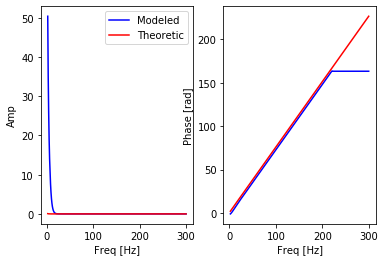

In [3]:
# Qp = 1 in the theoretic solution
qc.plot_spec('data_modeling', zsrc_plot=500, zrec_plot=500, vp=3000, qp=1)

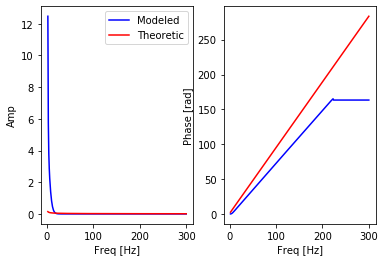

In [4]:
# Qp = 1000 in the theoretic solution
qc.plot_spec('data_modeling', zsrc_plot=0, zrec_plot=0, vp=3000, qp=1000)

In the following case, the arrival time the peak should be 150 ms (450 m / 3000 m/s); however, it is about 120 ms in the following figure.

zsrc = 525 [m], xsrc = 25 [m] 
zrec = 525 [m], xrec = 475 [m]


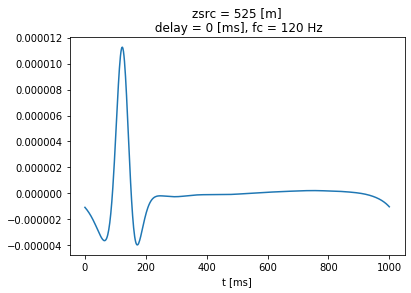

In [5]:
fc = 120
delay_n_period = 0
qc.freq2time('data_modeling', 'seismo_fdtest', fc, delay_n_period)
qc.plot_seismo('data_modeling', 'seismo_fdtest', 500, 500, fc, delay_n_period)